In [36]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from collections import defaultdict

# الف)

In [2]:
As = np.array([[0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 0, 0],
               [0, 0, 1, 0, 1, 0, 0],
               [0, 0, 1, 0, 1, 0, 0],
               [0, 1, 1, 1, 1, 1, 0],
               [0, 1, 0, 0, 0, 1, 0],
               [0, 1, 0, 0, 0, 1, 0],
               [1, 1, 1, 0, 1, 1, 1]])

At = np.array([[0, 1, 0],
               [1, 0, 1],
               [1, 1, 1],
               [1, 0, 1],
               [1, 0, 1]]) 

Bs = np.array([[1, 1, 1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0, 0, 1],
               [1, 0, 0, 0, 0, 1, 0],
               [1, 0, 0, 0, 1, 0, 0],
               [1, 1, 1, 1, 0, 0, 0],
               [1, 0, 0, 0, 1, 0, 0],
               [1, 0, 0, 0, 0, 1, 0],
               [1, 0, 0, 0, 0, 0, 1],
               [1, 1, 1, 1, 1, 1, 1]])

Bt = np.array([[1, 1, 0],
               [1, 0, 1],
               [1, 1, 0],
               [1, 0, 1],
               [1, 1, 0]]) 

Cs = np.array([[0, 0, 1, 1, 1, 1, 0],
               [0, 1, 0, 0, 0, 0, 1],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0],
               [0, 1, 0, 0, 0, 0, 1],
               [0, 0, 1, 1, 1, 1, 0]])

Ct = np.array([[0, 1, 1],
               [1, 0, 0],
               [1, 0, 0],
               [1, 0, 0],
               [0, 1, 1]])           

inputs = [As, Bs, Cs]
targets = [At, Bt, Ct]

for i in range(len(inputs)):
    inputs[i] = np.where(inputs[i] == 0, -1, inputs[i])
    inputs[i] = inputs[i].reshape(inputs[i].shape[0] * inputs[i].shape[1], -1)
    targets[i] = np.where(targets[i] == 0, -1, targets[i])
    targets[i] = targets[i].reshape(targets[i].shape[0] * targets[i].shape[1], -1)


In [21]:
class Hebbian:
    def __init__(self, noise=0, missing=0):
        self.W = None
        self.noise = noise
        self.missing = missing

    def fit(self, inputs, targets):
        self.W = np.sum([s @ t.T for s, t in zip(inputs, targets)], axis=0)
    

    def transform(self, inputs):
        S = deepcopy(inputs)
        if self.noise:
            S = self.add_noise(S)

        if self.missing:
            S = self.add_missing(S)

        outputs = []
        for s in S:
            outputs.append(np.sign(s.T @ self.W))
        return outputs

    def add_noise(self, inputs):
        for s in inputs:
            for i in range(len(s)):
                for j in range(len(s[i])):
                    if np.random.rand() < self.noise:
                        s[i][j] = -s[i][j]
        return inputs

    def add_missing(self, inputs):
        for s in inputs:
            for i in range(len(s)):
                for j in range(len(s[i])):
                    if np.random.rand() < self.missing:
                        s[i][j] = 0

        return inputs

    
hebbian = Hebbian()
hebbian.fit(inputs, targets)
outputs = hebbian.transform(inputs)

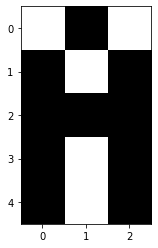

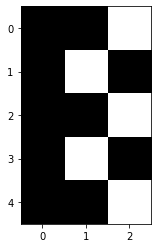

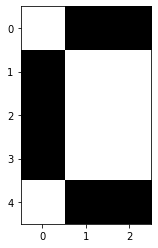

In [22]:
def show_outputs(outputs, shape=(5, 3)):
    for i in range(len(outputs)):
        outputs[i] = outputs[i].reshape(shape[0], shape[1])
        outputs[i] = np.where(outputs[i] == -1, 1, -1)
        plt.figure()
        plt.imshow(outputs[i], cmap='gray')

show_outputs(outputs)

# ب)

In [24]:
At_s = np.array([[1],[1]])
Bt_s = np.array([[-1],[1]])
Ct_s = np.array([[1],[-1]])

smallest_targets = [At_s, Bt_s, Ct_s]

hebbian = Hebbian()
hebbian.fit(inputs, smallest_targets)
outputs = hebbian.transform(inputs)

for output in outputs:
    print(output)

[[1 1]]
[[-1  1]]
[[ 1 -1]]


# ج)

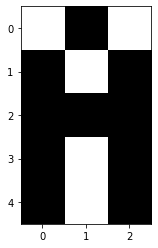

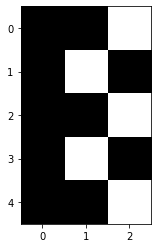

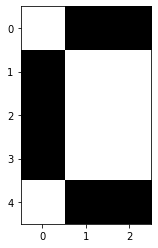

In [25]:
hebbian = Hebbian(noise=0.1)
hebbian.fit(inputs, targets)
outputs = hebbian.transform(inputs)
show_outputs(outputs)

In [26]:
hebbian = Hebbian(noise=0.1)
hebbian.fit(inputs, smallest_targets)
outputs = hebbian.transform(inputs)

for output in outputs:
    print(output)

[[1 1]]
[[-1  1]]
[[ 1 -1]]


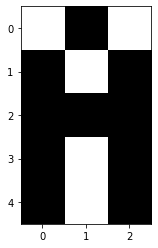

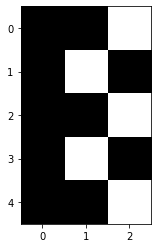

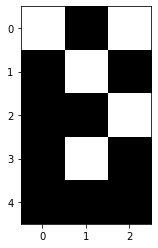

In [29]:
hebbian = Hebbian(noise=0.4)
hebbian.fit(inputs, targets)
outputs = hebbian.transform(inputs)
show_outputs(outputs)

In [35]:
hebbian = Hebbian(noise=0.4)
hebbian.fit(inputs, smallest_targets)
outputs = hebbian.transform(inputs)

for output in outputs:
    print(output)

[[-1  1]]
[[-1  1]]
[[ 1 -1]]


In [56]:
chars = ['A', 'B', 'C']

accs = defaultdict(list)
for _ in range(1000):
    hebbian = Hebbian(noise=0.1)
    hebbian.fit(inputs, targets)
    outputs = hebbian.transform(inputs)

    for char, (output, target) in enumerate(zip(outputs, targets)):
        output = output.reshape(output.shape[1], -1)
        target = target.reshape(target.shape[0], -1)
        acc = sum([1 if output[i] == target[i] else 0 for i in range(len(output))]) / len(output)
        accs[chars[char]].append(acc)

for i in range(len(chars)):
    print(f"{chars[i]}-true detected in : {(np.sum(np.where(np.array(accs[chars[i]]) == 1, 1, 0)) / float(len(accs[chars[i]])))*100}% times")
    print('-' * 20)


A-true detected in : 100.0% times
--------------------
B-true detected in : 99.9% times
--------------------
C-true detected in : 99.6% times
--------------------


In [62]:
chars = ['A', 'B', 'C']

accs = defaultdict(list)
for _ in range(1000):
    hebbian = Hebbian(noise=0.4)
    hebbian.fit(inputs, targets)
    outputs = hebbian.transform(inputs)

    for char, (output, target) in enumerate(zip(outputs, targets)):
        output = output.reshape(output.shape[1], -1)
        target = target.reshape(target.shape[0], -1)
        acc = sum([1 if output[i] == target[i] else 0 for i in range(len(output))]) / len(output)
        accs[chars[char]].append(acc)

for i in range(len(chars)):
    print(f"{chars[i]}-true detected in : {(np.sum(np.where(np.array(accs[chars[i]]) == 1, 1, 0)) / float(len(accs[chars[i]])))*100}% times")
    print('-' * 20)

A-true detected in : 52.7% times
--------------------
B-true detected in : 43.5% times
--------------------
C-true detected in : 45.9% times
--------------------


In [63]:
chars = ['A', 'B', 'C']

accs = defaultdict(list)
for _ in range(1000):
    hebbian = Hebbian(noise=0.1)
    hebbian.fit(inputs, smallest_targets)
    outputs = hebbian.transform(inputs)

    for char, (output, target) in enumerate(zip(outputs, smallest_targets)):
        output = output.reshape(output.shape[1], -1)
        target = target.reshape(target.shape[0], -1)
        acc = sum([1 if output[i] == target[i] else 0 for i in range(len(output))]) / len(output)
        accs[chars[char]].append(acc)

for i in range(len(chars)):
    print(f"{chars[i]}-true detected in : {(np.sum(np.where(np.array(accs[chars[i]]) == 1, 1, 0)) / float(len(accs[chars[i]])))*100}% times")
    print('-' * 20)

A-true detected in : 100.0% times
--------------------
B-true detected in : 99.8% times
--------------------
C-true detected in : 99.9% times
--------------------


In [66]:
chars = ['A', 'B', 'C']

accs = defaultdict(list)
for _ in range(1000):
    hebbian = Hebbian(noise=0.4)
    hebbian.fit(inputs, smallest_targets)
    outputs = hebbian.transform(inputs)

    for char, (output, target) in enumerate(zip(outputs, smallest_targets)):
        output = output.reshape(output.shape[1], -1)
        target = target.reshape(target.shape[0], -1)
        acc = sum([1 if output[i] == target[i] else 0 for i in range(len(output))]) / len(output)
        accs[chars[char]].append(acc)

for i in range(len(chars)):
    print(f"{chars[i]}-true detected in : {(np.sum(np.where(np.array(accs[chars[i]]) == 1, 1, 0)) / float(len(accs[chars[i]])))*100}% times")
    print('-' * 20)

A-true detected in : 76.3% times
--------------------
B-true detected in : 54.1% times
--------------------
C-true detected in : 54.1% times
--------------------


# ت)

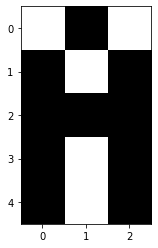

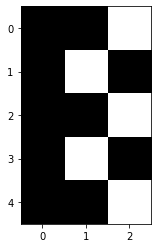

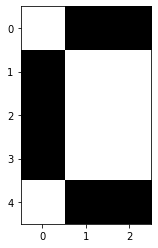

In [67]:
hebbian = Hebbian(missing=0.1)
hebbian.fit(inputs, targets)
outputs = hebbian.transform(inputs)
show_outputs(outputs)

In [68]:
hebbian = Hebbian(missing=0.1)
hebbian.fit(inputs, smallest_targets)
outputs = hebbian.transform(inputs)

for output in outputs:
    print(output)

[[1 1]]
[[-1  1]]
[[ 1 -1]]


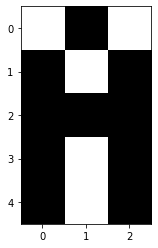

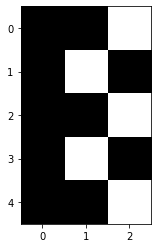

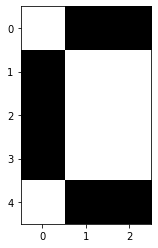

In [69]:
hebbian = Hebbian(missing=0.4)
hebbian.fit(inputs, targets)
outputs = hebbian.transform(inputs)
show_outputs(outputs)

In [70]:
hebbian = Hebbian(missing=0.4)
hebbian.fit(inputs, smallest_targets)
outputs = hebbian.transform(inputs)

for output in outputs:
    print(output)

[[1 1]]
[[-1  1]]
[[ 1 -1]]


In [76]:
chars = ['A', 'B', 'C']

accs = defaultdict(list)
for _ in range(1000):
    hebbian = Hebbian(missing=0.1)
    hebbian.fit(inputs, targets)
    outputs = hebbian.transform(inputs)

    for char, (output, target) in enumerate(zip(outputs, targets)):
        output = output.reshape(output.shape[1], -1)
        target = target.reshape(target.shape[0], -1)
        acc = sum([1 if output[i] == target[i] else 0 for i in range(len(output))]) / len(output)
        accs[chars[char]].append(acc)

for i in range(len(chars)):
    print(f"{chars[i]}-true detected in : {(np.sum(np.where(np.array(accs[chars[i]]) == 1, 1, 0)) / float(len(accs[chars[i]])))*100}% times")
    print('-' * 20)

A-true detected in : 100.0% times
--------------------
B-true detected in : 100.0% times
--------------------
C-true detected in : 100.0% times
--------------------


In [72]:
chars = ['A', 'B', 'C']

accs = defaultdict(list)
for _ in range(1000):
    hebbian = Hebbian(missing=0.4)
    hebbian.fit(inputs, targets)
    outputs = hebbian.transform(inputs)

    for char, (output, target) in enumerate(zip(outputs, targets)):
        output = output.reshape(output.shape[1], -1)
        target = target.reshape(target.shape[0], -1)
        acc = sum([1 if output[i] == target[i] else 0 for i in range(len(output))]) / len(output)
        accs[chars[char]].append(acc)

for i in range(len(chars)):
    print(f"{chars[i]}-true detected in : {(np.sum(np.where(np.array(accs[chars[i]]) == 1, 1, 0)) / float(len(accs[chars[i]])))*100}% times")
    print('-' * 20)

A-true detected in : 100.0% times
--------------------
B-true detected in : 99.9% times
--------------------
C-true detected in : 99.9% times
--------------------


In [78]:
chars = ['A', 'B', 'C']

accs = defaultdict(list)
for _ in range(1000):
    hebbian = Hebbian(missing=0.1)
    hebbian.fit(inputs, smallest_targets)
    outputs = hebbian.transform(inputs)

    for char, (output, target) in enumerate(zip(outputs, smallest_targets)):
        output = output.reshape(output.shape[1], -1)
        target = target.reshape(target.shape[0], -1)
        acc = sum([1 if output[i] == target[i] else 0 for i in range(len(output))]) / len(output)
        accs[chars[char]].append(acc)

for i in range(len(chars)):
    print(f"{chars[i]}-true detected in : {(np.sum(np.where(np.array(accs[chars[i]]) == 1, 1, 0)) / float(len(accs[chars[i]])))*100}% times")
    print('-' * 20)

A-true detected in : 100.0% times
--------------------
B-true detected in : 100.0% times
--------------------
C-true detected in : 100.0% times
--------------------


In [82]:
chars = ['A', 'B', 'C']

accs = defaultdict(list)
for _ in range(1000):
    hebbian = Hebbian(missing=0.4)
    hebbian.fit(inputs, smallest_targets)
    outputs = hebbian.transform(inputs)

    for char, (output, target) in enumerate(zip(outputs, smallest_targets)):
        output = output.reshape(output.shape[1], -1)
        target = target.reshape(target.shape[0], -1)
        acc = sum([1 if output[i] == target[i] else 0 for i in range(len(output))]) / len(output)
        accs[chars[char]].append(acc)

for i in range(len(chars)):
    print(f"{chars[i]}-true detected in : {(np.sum(np.where(np.array(accs[chars[i]]) == 1, 1, 0)) / float(len(accs[chars[i]])))*100}% times")
    print('-' * 20)

A-true detected in : 100.0% times
--------------------
B-true detected in : 99.9% times
--------------------
C-true detected in : 99.9% times
--------------------
